В качестве домашнего задания мы предлагаем вам решить задачу бинарной классификации на большом корпусе imdb рецензий на фильмы. 
Корпус можно скачать по ссылке http://ai.stanford.edu/~amaas/data/sentiment/

Ваша задача в sklearn, используя один из алгоритмов, рассмотренных на паре, построить и обучить классификатор, посчитать метрики качества (precision, recall, F-мера), построить ROC кривую и посчитайте величину ROC AUC.  - 4 балла

Используя предсказания вероятностей класса, найдите 15 самых негативных и самых позитивных рецензий по мнению модели.  - 3 балла

Написать свои функции, которые бы считали tp, fp, tn, fn, и возвращали точность, полноту и ф-меру и применить их к результатам, полученным вашими классификаторами (если все сделано правильно, то результаты должны совпадать с полученными  sklearn метриками). - 3 балла

In [1]:
import os
import random
import numpy as np

In [ ]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!gunzip aclImdb_v1.tar.gz
!tar -xvf aclImdb_v1.tar

In [3]:
#@title
#@Data_downloading
#this code was taken from https://developers.google.com/machine-learning/guides/text-classification/step-2


def load_imdb_sentiment_analysis_dataset(data_path, seed=123):
    imdb_data_path = os.path.join(data_path, 'aclImdb')

    # Load the training data
    train_texts = []
    train_labels = []
    for category in ['pos', 'neg']:
        train_path = os.path.join(imdb_data_path, 'train', category)
        for fname in sorted(os.listdir(train_path)):
            if fname.endswith('.txt'):
                with open(os.path.join(train_path, fname)) as f:
                    train_texts.append(f.read())
                train_labels.append(0 if category == 'neg' else 1)

    # Load the validation data.
    test_texts = []
    test_labels = []
    for category in ['pos', 'neg']:
        test_path = os.path.join(imdb_data_path, 'test', category)
        for fname in sorted(os.listdir(test_path)):
            if fname.endswith('.txt'):
                with open(os.path.join(test_path, fname)) as f:
                    test_texts.append(f.read())
                test_labels.append(0 if category == 'neg' else 1)

    # Shuffle the training data and labels.
    random.seed(seed)
    random.shuffle(train_texts)
    random.seed(seed)
    random.shuffle(train_labels)

    return ((train_texts, np.array(train_labels)),
            (test_texts, np.array(test_labels)))

In [4]:
train_data, test_data = load_imdb_sentiment_analysis_dataset('')

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train_data[0]) #Learn the vocabulary dictionary and return term-document matrix.
X_test = count_vect.transform(test_data[0])

In [6]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=2000).fit(X_train_counts, train_data[1])
predicted = clf.predict(X_test)
predicted_score = clf.score(X_train_counts, train_data[1])

In [35]:
predicted_score = clf.predict_proba(X_test)
predicted_score_neg = [s[0] for s in predicted_score]
predicted_score_pos = [s[1] for s in predicted_score]
inds_neg = np.argsort(predicted_score_neg)[-15:]
inds_pos = np.argsort(predicted_score_pos)[-15:]

print('Негативные')
j = 0
for i in inds_neg:
  j += 1
  print(j)
  print(test_data[0][i])
print('----------------------')
j = 0
print('Позитивные')
for i in inds_pos:
  j += 1
  print(j)
  print(test_data[0][i])

Негативные
1
It is the early morning of our discontent, and some friends of mine and I have just gotten through watching "The Wind." Truly a disaster film. Not in the sense of forces of nature wreaking havoc on an unsuspecting populace, but rather an awful movie wreaking havoc on an unsuspecting audience. To give you an indication of how frustrating it was to watch this particular bomb, I'll give you an example quoted during my first pained viewing. If given the choice of watching this movie for a second time and, say, boiling myself, I'm afraid to say the choice would not be an immediate one. But rather than simply ranting "ad peliculam" with lousy one-liners, I'm going to get specific as to why exactly my friends and I panned this particular film.<br /><br />To start this off, I like low-budget horror flicks. I even like artsy, low-budget horror flicks. I liked "Cold Hearts", "Midnight Mass," "Jugular Wine," etc. Films that were ambitious and daring, even if they were lacking in prod

In [20]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score, precision_score, recall_score
from matplotlib import pyplot

In [21]:
sklearn_acc = accuracy_score(test_data[1], predicted)
sklearn_f1 = f1_score(test_data[1], predicted)
sklearn_precision = precision_score(test_data[1], predicted)
sklearn_recall = recall_score(test_data[1], predicted)

print('acc={0:1.4f}'.format(sklearn_acc))
print('F1={0:1.4f}, P={1:1.4f}, R={2:1.4f}'.format(sklearn_f1, sklearn_precision, sklearn_recall))

acc=0.8667
F1=0.8657, P=0.8726, R=0.8588


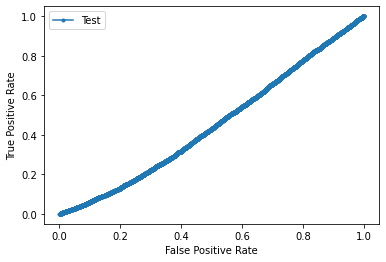

In [22]:
y_true = test_data[1]
y_predicted = predicted
y_predicted_proba = clf.predict_proba(X_test)
y_predicted_score = [max(i) for i in y_predicted_proba]
fpr, tpr, thrhld = roc_curve(y_true, y_predicted_score)
pyplot.plot(fpr, tpr, marker='.', label='Test')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [23]:
print(f'roc auc score: {roc_auc_score(y_true, y_predicted_score)}')

roc auc score: 0.4515235872


(array([  533.,   569.,   580.,   596.,   697.,   741.,   883.,  1261.,
         1977., 17163.]),
 array([0.50031127, 0.55028015, 0.60024902, 0.65021789, 0.70018676,
        0.75015564, 0.80012451, 0.85009338, 0.90006225, 0.95003113,
        1.        ]),
 <a list of 10 Patch objects>)

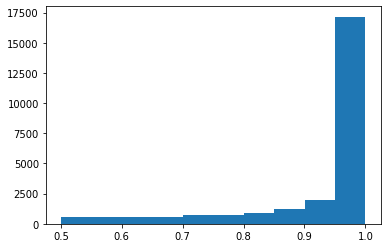

In [11]:
#Видимо, такой плохой рок аук у нас получился из-за небалансированности классов
pyplot.hist(y_predicted_score)

In [12]:
def tp(y_predicted, y_true):
    tp = 0
    for i in range(len(y_true)):
        if y_true[i]==1 and y_predicted[i]==1:
            tp+=1
    return tp


def tn(y_predicted, y_true):
    tn = 0
    for i in range(len(y_true)):
        if y_true[i]==0 and y_predicted[i]==0:
            tn+=1
    return tn


def fp(y_predicted, y_true):
    fp = 0
    for i in range(len(y_true)):
        if y_true[i]==0 and y_predicted[i]==1:
            fp+=1
    return fp


def fn(y_predicted, y_true):
    fn = 0
    for i in range(len(y_true)):
        if y_true[i]==1 and y_predicted[i]==0:
            fn+=1
    return fn


def my_accuracy(y_predicted, y_true):
    return (tp(y_predicted, y_true) + tn(y_predicted, y_true))/(tp(y_predicted, y_true) + tn(y_predicted, y_true) + 
            fp(y_predicted, y_true) + fn(y_predicted, y_true))


def my_precision(y_predicted, y_true):
    return tp(y_predicted, y_true)/(tp(y_predicted, y_true) + fp(y_predicted, y_true))


def my_recall(y_predicted, y_true):
    return tp(y_predicted, y_true)/(tp(y_predicted, y_true)+fn(y_predicted, y_true))


def my_f(y_predicted, y_true):
    return 2*my_precision(y_predicted, y_true)*my_recall(y_predicted, y_true)/(my_precision(y_predicted, y_true) + my_recall(y_predicted, y_true))

In [13]:
print('F1={0:1.4f}, P={1:1.4f}, R={2:1.4f}'.format(sklearn_f1, sklearn_precision, sklearn_recall))
print('These are sklearn metrics:')
print(f'F1={sklearn_f1}, P={sklearn_precision}, R={sklearn_recall}')
print('These are my metrics:')
print(f'F1={my_f(y_predicted, y_true)}, P={my_precision(y_predicted, y_true)}, R={my_recall(y_predicted, y_true)}')
print('\nThis is catapillar:')
print('╚═( ͡° ͜ʖ ͡°)═╝\n╚═(███)═╝\n╚═(███)═╝\n.╚═(███)═╝\n..╚═(███)═╝\n.╚═(███)═╝\n╚═(███)═╝\n.╚═(███)═╝\n..╚═(███)═╝\n…╚═(███)═╝\n…╚═(███)═╝\n…..╚(███)╝\n……╚(██)╝\n………(█)')

F1=0.8657, P=0.8726, R=0.8588
These are sklearn metrics:
F1=0.8656559954842351, P=0.872622337831247, R=0.8588
These are my metrics:
F1=0.8656559954842351, P=0.872622337831247, R=0.8588

This is catapillar:
╚═( ͡° ͜ʖ ͡°)═╝
╚═(███)═╝
╚═(███)═╝
.╚═(███)═╝
..╚═(███)═╝
.╚═(███)═╝
╚═(███)═╝
.╚═(███)═╝
..╚═(███)═╝
…╚═(███)═╝
…╚═(███)═╝
…..╚(███)╝
……╚(██)╝
………(█)
